In [2]:
import pandas as pd
import numpy as np

In [4]:
# for visualization
import matplotlib.pyplot as plt

In [21]:
# for regular exprecession
import re
# for handling string
import string
import math

In [6]:
# importing dataset
df = pd.read_csv('consumer-reviews-of-amazon-products/1429_1.csv')
print(df.shape)

(34660, 21)


/Users/w01334/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df = df[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]
print("Shape of data=>",df.shape)
df.head(5)

Shape of data=> (34660, 4)


,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0


In [10]:
# Let’s see if there are any null values present in our dataset:
df.isnull().sum()

name                   6760
reviews.text              1
reviews.doRecommend     594
reviews.numHelpful      529
dtype: int64

In [11]:
# There are a few null values in the dataset. So, let’s drop these null values and proceed further:
df.dropna(inplace=True)
df.isnull().sum()

/Users/w01334/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

In [13]:
# filter the rows and keep the product who has more than 500 reviews
df = df.groupby('name').filter(lambda x: len(x)>500).reset_index(drop=True)
print('Number of Products =>',len(df['name'].unique()))

Number of Products => 8


In [14]:
df['reviews.doRecommend'] = df['reviews.doRecommend'].astype(int)
df['reviews.numHelpful'] = df['reviews.numHelpful'].astype(int)

In [15]:
# cleaning text data 
df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White),,,\r\nEcho (White),,,',
       'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'], dtype=object)

In [16]:
df['name'] = df['name'].apply(lambda x: x.split(',,,')[0])

In [17]:
# display the review and next step is to clean review
for index, text in enumerate(df['reviews.text'][35:40]):
    print('Review %d\n'%(index+1),text)

Review 1
 I love everything about this tablet! The imaging is sharp and clear. It's fast and light weight. Love it!
Review 2
 Overall a nice product for traveling purposes Value for money
Review 3
 My children love this table great quality of pictures, excellent camera
Review 4
 I bought 3 tablets and my family was not disappointed.
Review 5
 Great tablet fast screen good size never gives me problem


Here, you can see that we have some contractions like “It’s”, numbers like “3” and punctuations like “,”, “!” and “.” present in the reviews. We’ll handle these by performing the below operations:

Expand contractions
Lowercase the reviews
Remove digits and words containing digits
Remove punctuations
So, let’s start by expanding contractions.

In [18]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [24]:
# Regular expression for handling contractions
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [25]:
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['reviews.text'] = df['reviews.text'].apply(lambda x:expand_contractions(x))

In [26]:
# display the review and next step is to clean review
for index, text in enumerate(df['reviews.text'][35:40]):
    print('Review %d\n'%(index+1),text)

Review 1
 I love everything about this tablet! The imaging is sharp and clear. It is fast and light weight. Love it!
Review 2
 Overall a nice product for traveling purposes Value for money
Review 3
 My children love this table great quality of pictures, excellent camera
Review 4
 I bought 3 tablets and my family was not disappointed.
Review 5
 Great tablet fast screen good size never gives me problem


In [27]:
df['cleaned']=df['reviews.text'].apply(lambda x: x.lower())

In [28]:
# Remove digits and words containing digits
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [29]:
# Remove Punctuations
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [30]:
# display the review and next step is to clean review
for index, text in enumerate(df['cleaned'][35:40]):
    print('Review %d\n'%(index+1),text)

Review 1
 i love everything about this tablet the imaging is sharp and clear it is fast and light weight love it
Review 2
 overall a nice product for traveling purposes value for money
Review 3
 my children love this table great quality of pictures excellent camera
Review 4
 i bought  tablets and my family was not disappointed
Review 5
 great tablet fast screen good size never gives me problem


In [31]:
# Removing extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [32]:
for index,text in enumerate(df['cleaned'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 i love everything about this tablet the imaging is sharp and clear it is fast and light weight love it
Review 2:
 overall a nice product for traveling purposes value for money
Review 3:
 my children love this table great quality of pictures excellent camera
Review 4:
 i bought tablets and my family was not disappointed
Review 5:
 great tablet fast screen good size never gives me problem


# Preparing Text Data for Exploratory Data Analysis (EDA)

#In this section, we’ll create a Document Term Matrix that we’ll later use in our analysis
In this section, we’ll do the following things:

Stopwords Removal
Lemmatization
Create Document Term Matrix

In [45]:
#importing SpaCy
import spacy
import en_core_web_sm

#loading model 
nlp = en_core_web_sm.load(disable=['parser','ner'])

#Lemitization with stopwords removel
df['lemmatized'] = df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [46]:
#We have removed stopwords and lemmatized our reviews successfully. Let’s group them according to the products:
df_grouped = df[['name','lemmatized']].groupby(by='name').agg(lambda x: ''.join(x))

In [47]:
df_grouped.head()

,lemmatized
name,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",product far disappoint child love use like abi...
Amazon Fire Tv,echo learn everyday use daily use place speake...
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,nice little set slow wish investigate little j...
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,good value money hand work perfectlypurchase d...
Echo (White),compete ipad high end android tablet easily ou...


It’s time to create a Document Term Matrix. You can read more about the document term matrix here.

In [53]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aa,aaahandy,aamazon,abandon,abattery,abc,abcmouse,abcmousecom,abcs,abd,...,zero,zigbee,zinio,zip,zippy,zone,zoo,zoom,zooming,zwave
name,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",0,0,0,0,0,0,0,0,0,0,...,4,0,1,0,0,0,0,0,0,0
Amazon Fire Tv,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,0,0,0,1,0,2,0,0,0,0,...,4,0,0,0,0,2,0,2,0,0


Word clouds can be generated using the wordcloud library. So, let’s plot word clouds for each product:

In [57]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

In [58]:
# function for genrating word clouds
def gen_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()

In [59]:
# Transposing document term matrix
df_dtm=df_dtm.transpose()

In [60]:
df_dtm.head(3)

name,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",Amazon Fire Tv,Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,Echo (White),"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case","Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta","Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,"
aa,0,0,0,0,0,1,0,0
aaahandy,0,1,0,0,0,0,0,0
aamazon,0,1,0,0,0,0,0,0


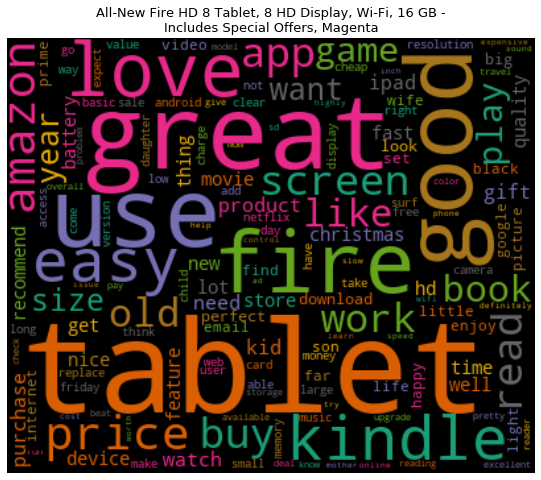

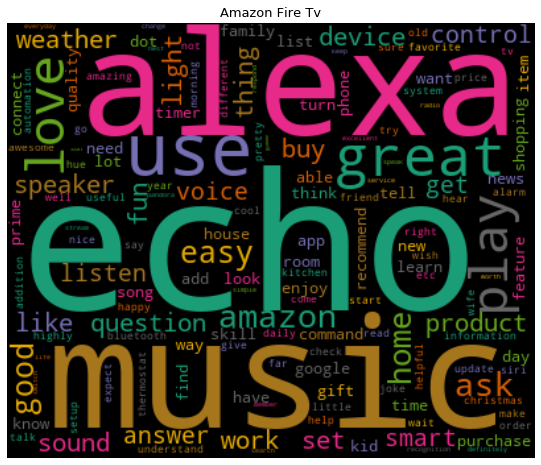

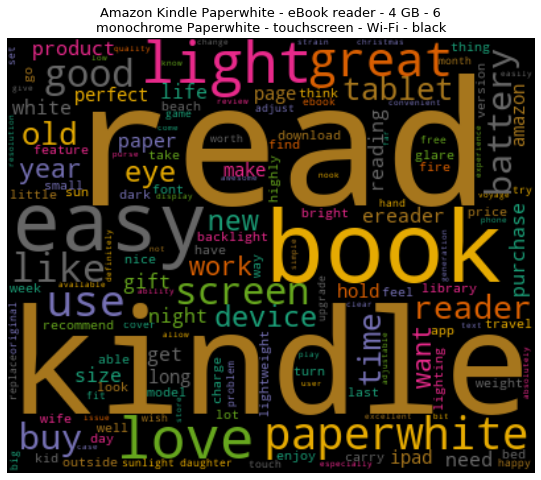

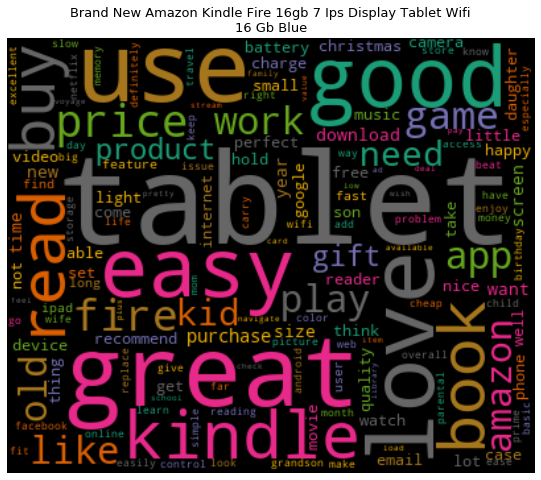

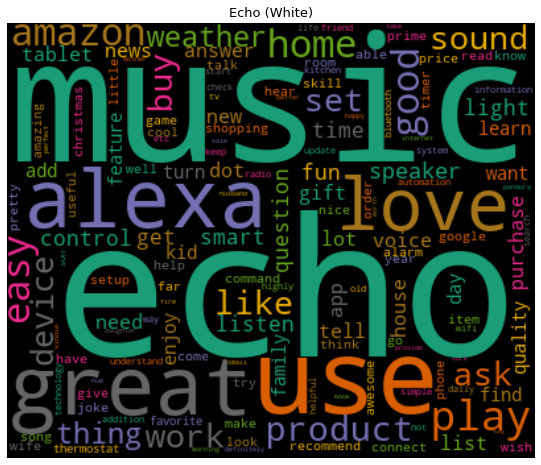

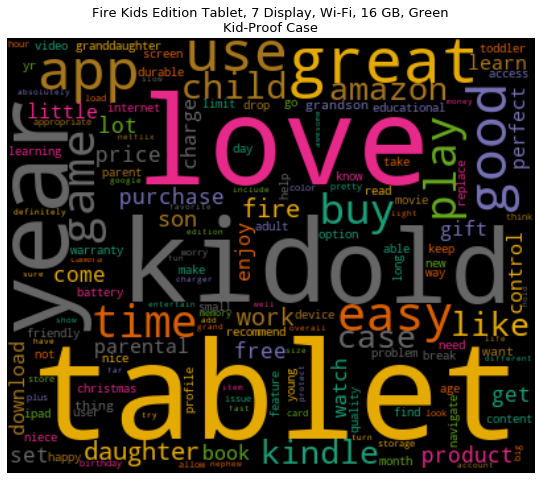

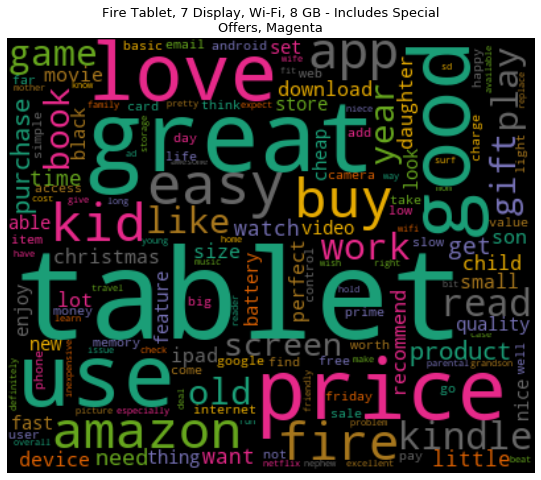

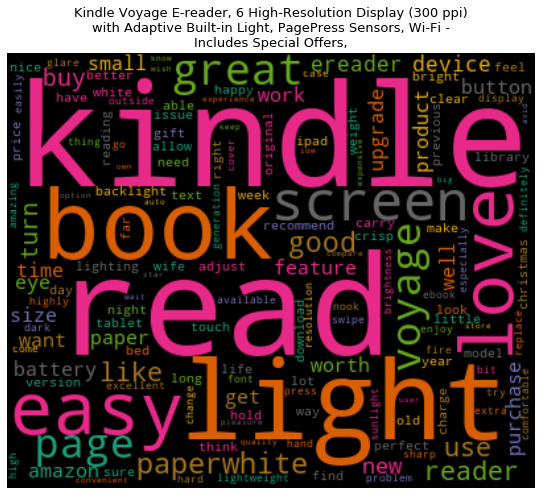

In [63]:
# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
    #print(df_dtm[product].sort_values(ascending=False))
    gen_wordcloud(df_dtm[product].sort_values(ascending=False),product)